INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

REGRESIÓN NO LINEAL

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
10/10/2024

# Librerías y carga de Archivo

In [101]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [102]:
# %pip install scipy

In [103]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop(["Unnamed: 0","price"], axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [104]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,1,...,3,2,3,3,5,0.65,5,5,5,5
1,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,2,...,1,3,3,2,5,0.04,5,5,5,5
2,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,1,...,3,2,4,1,5,0.12,5,5,5,5
3,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,5,...,3,2,3,4,5,0.57,5,5,5,5
4,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,2,...,3,2,3,2,5,0.09,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,1,...,3,2,4,1,5,1.16,5,5,5,5
2858,348027803,2020,1,2,1,1,45.419361,-75.667223,1.0,1,...,3,3,3,1,5,1.16,5,5,5,5
2859,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,4,...,3,2,3,4,5,1.16,5,5,5,5
2860,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,2,...,3,2,3,1,5,1.16,5,5,5,5


# Modelos no lineales

## host_response_rate

In [105]:
# Graficamos todas las dispersiones entre todas las variables
# Calcular la matriz de correlación
corrMatrix = abs(df.corr())
corrMatrix

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_id,1.000000,0.978197,0.041056,0.148848,0.227036,0.160939,0.168459,0.024808,0.053916,0.032607,...,0.051036,0.032957,0.032431,0.032600,0.011717,0.100327,0.018576,0.002493,0.036411,0.007485
host_since,0.978197,1.000000,0.035841,0.136616,0.221458,0.160906,0.161580,0.024865,0.054113,0.027775,...,0.063867,0.034632,0.031753,0.038411,0.020098,0.107071,0.022636,0.003747,0.031133,0.002593
host_is_superhost,0.041056,0.035841,1.000000,0.122485,0.086512,0.147664,0.064239,0.036355,0.101777,0.071125,...,0.188698,0.032355,0.000357,0.094979,0.141566,0.180295,0.105707,0.142928,0.135385,0.101588
host_listings_count,0.148848,0.136616,0.122485,1.000000,0.041402,0.047697,0.053106,0.058497,0.045751,0.056410,...,0.068758,0.011781,0.071609,0.036876,0.161306,0.088351,0.053612,0.154757,0.106547,0.172491
host_has_profile_pic,0.227036,0.221458,0.086512,0.041402,1.000000,0.129138,0.052801,0.002596,0.020073,0.044513,...,0.088668,0.007477,0.014333,0.006706,0.010529,0.032658,0.001360,0.014310,0.022187,0.026476
host_identity_verified,0.160939,0.160906,0.147664,0.047697,0.129138,1.000000,0.026414,0.005948,0.016980,0.009126,...,0.038680,0.004773,0.021856,0.032088,0.000283,0.030084,0.021122,0.010723,0.025298,0.015666
latitude,0.168459,0.161580,0.064239,0.053106,0.052801,0.026414,1.000000,0.421120,0.175858,0.087439,...,0.018577,0.003244,0.066906,0.007230,0.072335,0.040377,0.020104,0.066019,0.054089,0.023818
longitude,0.024808,0.024865,0.036355,0.058497,0.002596,0.005948,0.421120,1.000000,0.055849,0.044593,...,0.033186,0.039824,0.009075,0.055671,0.009282,0.034426,0.014012,0.017602,0.009889,0.018083
bathrooms,0.053916,0.054113,0.101777,0.045751,0.020073,0.016980,0.175858,0.055849,1.000000,0.643555,...,0.034191,0.020004,0.131628,0.478371,0.062708,0.007807,0.032796,0.046436,0.030645,0.003820
bedrooms,0.032607,0.027775,0.071125,0.056410,0.044513,0.009126,0.087439,0.044593,0.643555,1.000000,...,0.004636,0.052248,0.298946,0.628469,0.049632,0.037569,0.030059,0.029498,0.000923,0.010189


<Axes: >

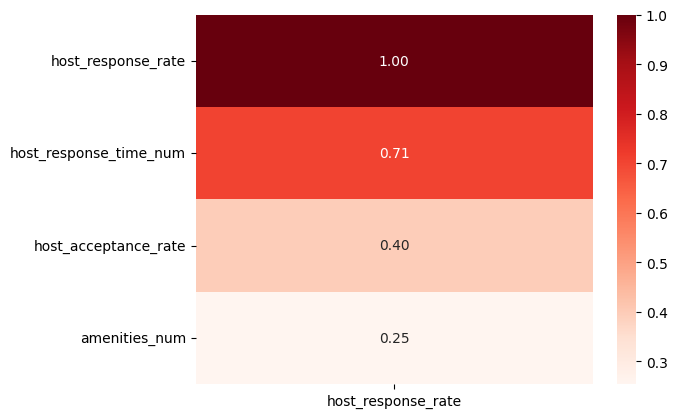

In [106]:
corrMatrix = abs(df.corr()['host_response_rate'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Cuadrática

In [107]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['host_response_time_num']]
Var_Dep = df['host_response_rate']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros1, covs = curve_fit(func_cuadratica, df["host_response_time_num"], df['host_response_rate']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros1

# Predicciones

y_pred1 = func_cuadratica(x,*parametros1) # El * da todas las posiciones
# y_pred1 = func1(x,parametros1[0]) # Obtener solo un valor
# Observamos los valores
y_pred1

# Calculamos el coeficiente de determinación del modelo

R2_Modelo1 = r2_score(y, y_pred1)
R2_Modelo1

# Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.9044421869881762)

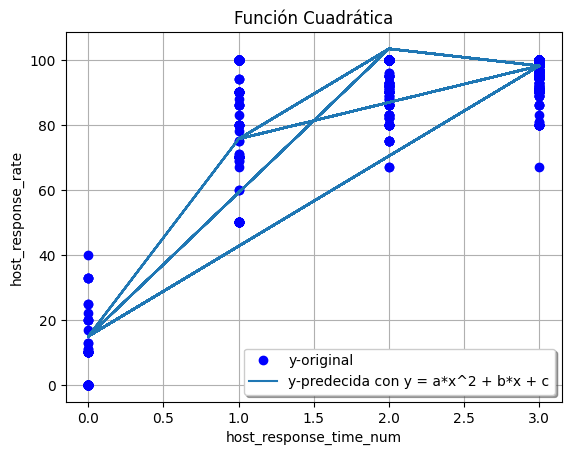

In [108]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred1, label = "y-predecida con y = a*x^2 + b*x + c")
plt.xlabel('host_response_time_num')
plt.ylabel('host_response_rate')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función Polinomial Inversa

In [109]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['host_response_time_num']]
Var_Dep = df['host_response_rate']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_polinomial_inversa(x, a, b, c):
    return a / b * x**2 + c * x

# Ajustar los parámetros de la función curve_fit

parametros2, covs = curve_fit(func_polinomial_inversa, df["host_response_time_num"], df['host_response_rate']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros2

# Predicciones

y_pred2 = func_polinomial_inversa(x,*parametros2) # El * da todas las posiciones

# Observamos los valores
y_pred2

# Calculamos el coeficiente de determinación del modelo

R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2

# Calculamos el coeficiente de correlación del modelo
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(0.8893557503668872)

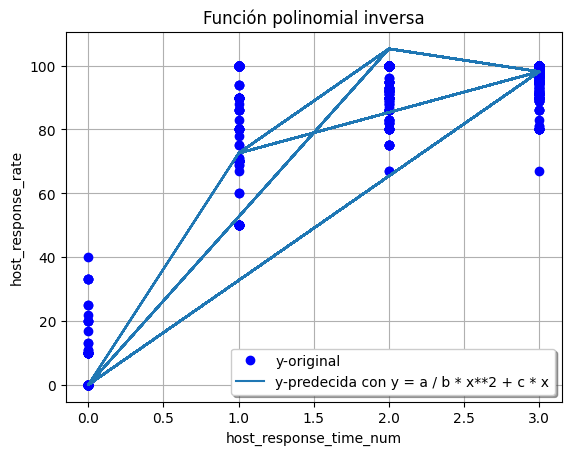

In [110]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred2, label = "y-predecida con y = a / b * x**2 + c * x")
plt.xlabel('host_response_time_num')
plt.ylabel('host_response_rate')
plt.title("Función polinomial inversa")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

## host_acceptance_rate

<Axes: >

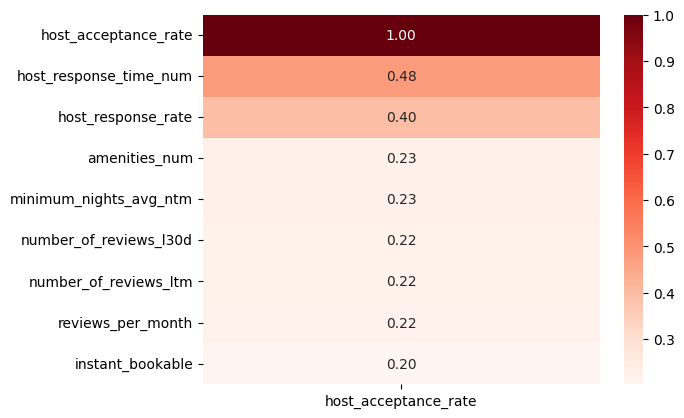

In [111]:
corrMatrix = abs(df.corr()['host_acceptance_rate'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Cuadrática

In [112]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['host_response_time_num']]
Var_Dep = df['host_acceptance_rate']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros3, covs = curve_fit(func_cuadratica, df["host_response_time_num"], df['host_acceptance_rate']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros3

# Predicciones

y_pred3 = func_cuadratica(x,*parametros3) # El * da todas las posiciones

# Observamos los valores
y_pred3

# Calculamos el coeficiente de determinación del modelo

R2_Modelo3 = r2_score(y, y_pred3)
R2_Modelo3

# Calculamos el coeficiente de correlación del modelo
R3 = np.sqrt(R2_Modelo3)
R3

np.float64(0.4858248917094962)

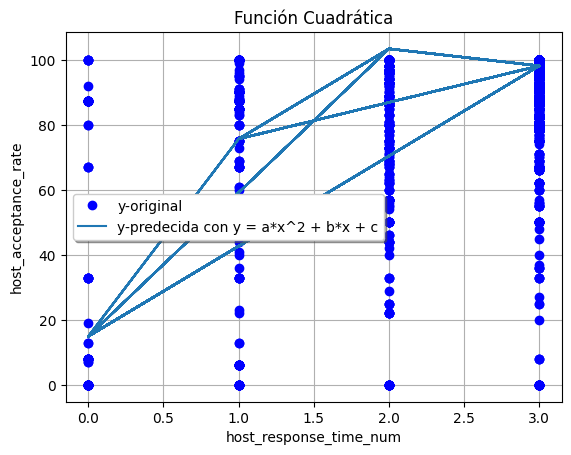

In [113]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred1, label = "y-predecida con y = a*x^2 + b*x + c")
plt.xlabel('host_response_time_num')
plt.ylabel('host_acceptance_rate')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función de Valor Absoluto

In [114]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['host_response_time_num']]
Var_Dep = df['host_acceptance_rate']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_abs(x, a, b, c):
    return a * np.abs(x) + b * x + c

# Ajustar los parámetros de la función curve_fit

parametros4, covs = curve_fit(func_abs, df["host_response_time_num"], df['host_acceptance_rate']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros4

# Predicciones

y_pred4 = func_abs(x,*parametros4) # El * da todas las posiciones

# Observamos los valores
y_pred4

# Calculamos el coeficiente de determinación del modelo

R2_Modelo4 = r2_score(y, y_pred4)
R2_Modelo4

# Calculamos el coeficiente de correlación del modelo
R4 = np.sqrt(R2_Modelo4)
R4

np.float64(0.48130940081970186)

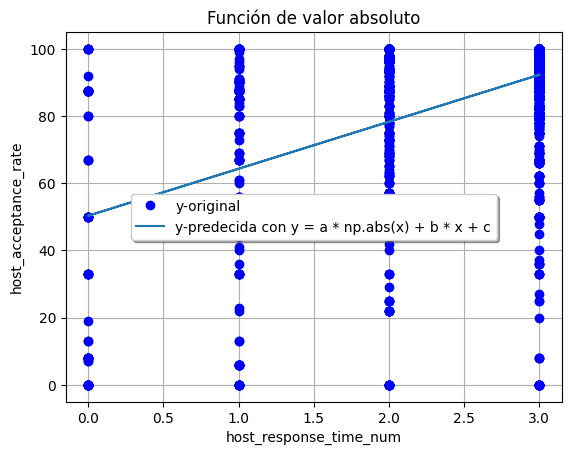

In [115]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred4, label = "y-predecida con y = a * np.abs(x) + b * x + c")
plt.xlabel('host_response_time_num')
plt.ylabel('host_acceptance_rate')
plt.title("Función de valor absoluto")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

## host_total_listings_count

<Axes: >

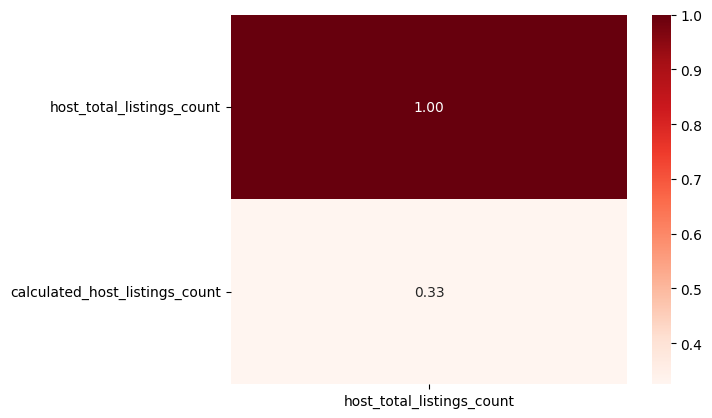

In [116]:
corrMatrix = abs(df.corr()['host_total_listings_count'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Cuadrática

In [117]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['calculated_host_listings_count']]
Var_Dep = df['host_total_listings_count']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros5, covs = curve_fit(func_cuadratica, df["calculated_host_listings_count"], df['host_total_listings_count']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros5

# Predicciones

y_pred5 = func_cuadratica(x,*parametros5) # El * da todas las posiciones

# Observamos los valores
y_pred5

# Calculamos el coeficiente de determinación del modelo

R2_Modelo5 = r2_score(y, y_pred5)
R2_Modelo5

# Calculamos el coeficiente de correlación del modelo
R5 = np.sqrt(R2_Modelo5)
R5

np.float64(0.6584969722947495)

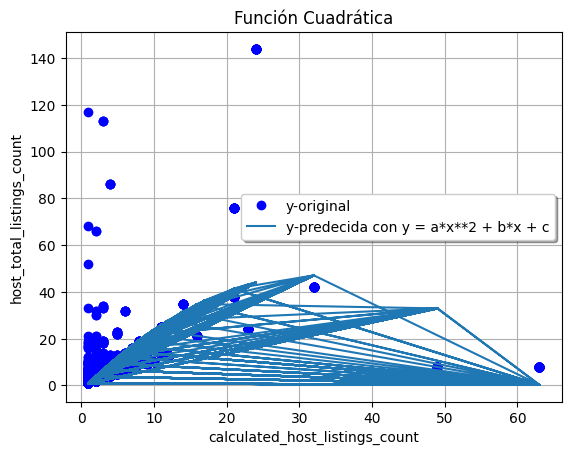

In [118]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred5, label = "y-predecida con y = a*x**2 + b*x + c")
plt.xlabel('calculated_host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función Polinomial Inversa

In [119]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['calculated_host_listings_count']]
Var_Dep = df['host_total_listings_count']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_polinomial_inversa(x, a, b, c):
    return a / b * x**2 + c * x

# Ajustar los parámetros de la función curve_fit

parametros6, covs = curve_fit(func_polinomial_inversa, df["calculated_host_listings_count"], df['host_total_listings_count']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros6

# Predicciones

y_pred6 = func_polinomial_inversa(x,*parametros6) # El * da todas las posiciones

# Observamos los valores
y_pred6

# Calculamos el coeficiente de determinación del modelo

R2_Modelo6 = r2_score(y, y_pred6)
R2_Modelo6

# Calculamos el coeficiente de correlación del modelo
R6 = np.sqrt(R2_Modelo6)
R6

np.float64(0.6515056320397723)

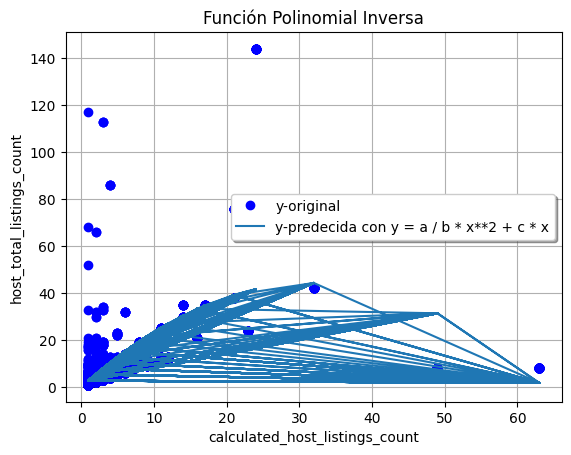

In [120]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred6, label = "y-predecida con y = a / b * x**2 + c * x")
plt.xlabel('calculated_host_listings_count')
plt.ylabel('host_total_listings_count')
plt.title("Función Polinomial Inversa")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

## accommodates

<Axes: >

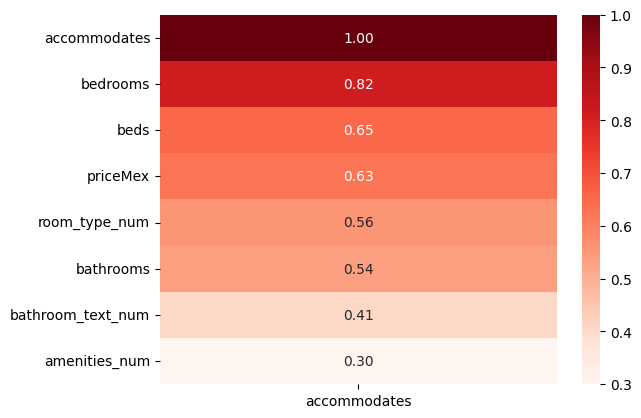

In [121]:
corrMatrix = abs(df.corr()['accommodates'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Cuadrática

In [122]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['bedrooms']]
Var_Dep = df['accommodates']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros7, covs = curve_fit(func_cuadratica, df["bedrooms"], df['accommodates']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros7

# Predicciones

y_pred7 = func_cuadratica(x,*parametros7) # El * da todas las posiciones

# Observamos los valores
y_pred7

# Calculamos el coeficiente de determinación del modelo

R2_Modelo7 = r2_score(y, y_pred7)
R2_Modelo7

# Calculamos el coeficiente de correlación del modelo
R7 = np.sqrt(R2_Modelo7)
R7

np.float64(0.8211102139985772)

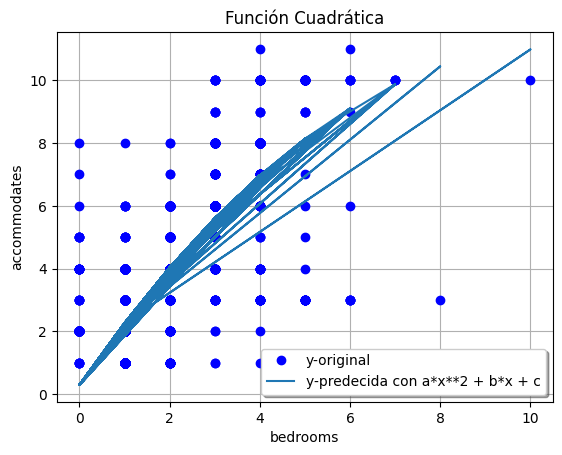

In [123]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred7, label = "y-predecida con a*x**2 + b*x + c")
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función Polinomial Inversa

In [124]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['bedrooms']]
Var_Dep = df['accommodates']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_polinomial_inversa(x, a, b, c):
    return a / b * x**2 + c * x

# Ajustar los parámetros de la función curve_fit

parametros8, covs = curve_fit(func_polinomial_inversa, df["bedrooms"], df['accommodates']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros8

# Predicciones

y_pred8 = func_polinomial_inversa(x,*parametros8) # El * da todas las posiciones

# Observamos los valores
y_pred8

# Calculamos el coeficiente de determinación del modelo

R2_Modelo8 = r2_score(y, y_pred8)
R2_Modelo8

# Calculamos el coeficiente de correlación del modelo
R8 = np.sqrt(R2_Modelo8)
R8

np.float64(0.819732952825254)

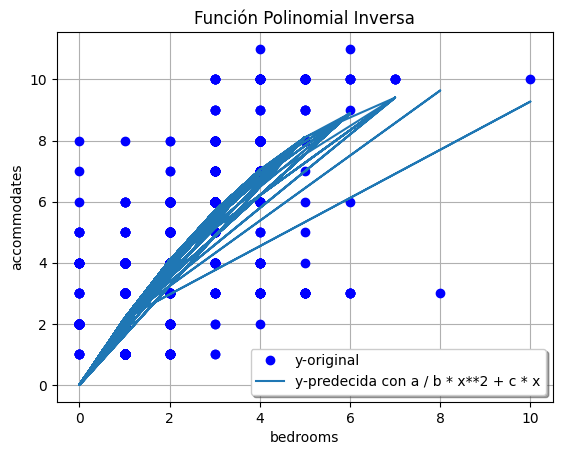

In [125]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred8, label = "y-predecida con a / b * x**2 + c * x")
plt.xlabel('bedrooms')
plt.ylabel('accommodates')
plt.title("Función Polinomial Inversa")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

## reviews_per_month

<Axes: >

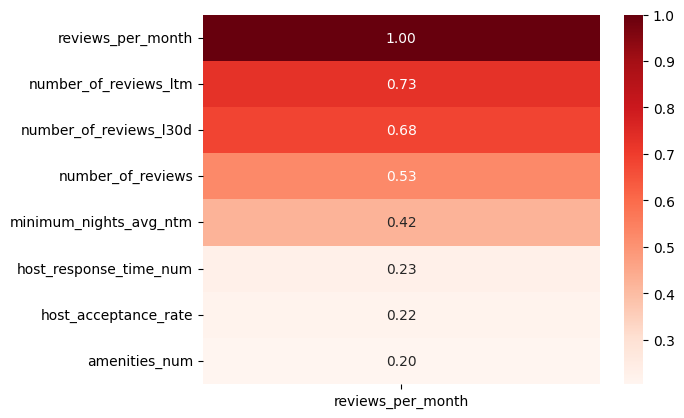

In [126]:
corrMatrix = abs(df.corr()['reviews_per_month'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Exponencial

In [127]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['number_of_reviews_ltm']]
Var_Dep = df['reviews_per_month']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_exponencial(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustar los parámetros de la función curve_fit

parametros9, covs = curve_fit(func_exponencial, df["number_of_reviews_ltm"], df['reviews_per_month']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros9

# Predicciones

y_pred9 = func_exponencial(x,*parametros9) # El * da todas las posiciones

# Observamos los valores
y_pred9

# Calculamos el coeficiente de determinación del modelo

R2_Modelo9 = r2_score(y, y_pred9)
R2_Modelo9

# Calculamos el coeficiente de correlación del modelo
R9 = np.sqrt(R2_Modelo9)
R9

c:\Users\Angel González\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


np.float64(0.8110288416233699)

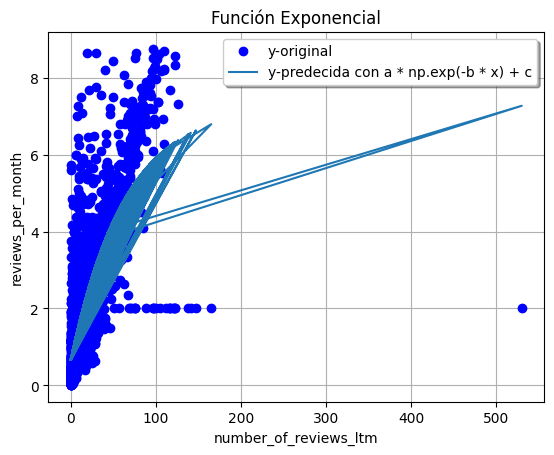

In [128]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred9, label = "y-predecida con a * np.exp(-b * x) + c")
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title("Función Exponencial")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función Cuadrática

In [129]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['number_of_reviews_ltm']]
Var_Dep = df['reviews_per_month']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros10, covs = curve_fit(func_cuadratica, df["number_of_reviews_ltm"], df['reviews_per_month']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros10

# Predicciones

y_pred10 = func_cuadratica(x,*parametros10) # El * da todas las posiciones

# Observamos los valores
y_pred10

# Calculamos el coeficiente de determinación del modelo

R2_Modelo10 = r2_score(y, y_pred10)
R2_Modelo10

# Calculamos el coeficiente de correlación del modelo
R10 = np.sqrt(R2_Modelo10)
R10

np.float64(0.8039871876975594)

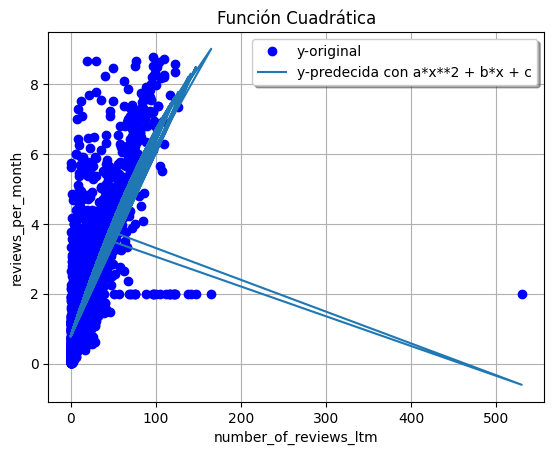

In [130]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred10, label = "y-predecida con a*x**2 + b*x + c")
plt.xlabel('number_of_reviews_ltm')
plt.ylabel('reviews_per_month')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

## PriceMex

<Axes: >

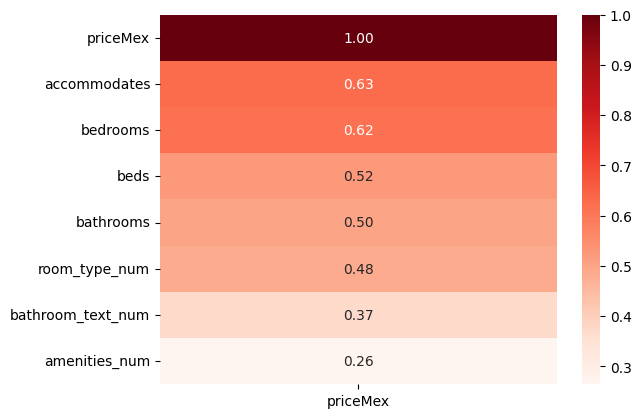

In [131]:
corrMatrix = abs(df.corr()['priceMex'])
corrMatrix = corrMatrix[corrMatrix.abs() > 0.2].sort_values(ascending=False).to_frame()
corrMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Reds', annot = True, fmt = ".2f")
Heat_Map

### Función Cuadrática

In [132]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['accommodates']]
Var_Dep = df['priceMex']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_cuadratica (x,a,b,c):
  return a*x**2 + b*x + c

# Ajustar los parámetros de la función curve_fit

parametros11, covs = curve_fit(func_cuadratica, df["accommodates"], df['priceMex']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros11

# Predicciones

y_pred11 = func_cuadratica(x,*parametros11) # El * da todas las posiciones

# Observamos los valores
y_pred11

# Calculamos el coeficiente de determinación del modelo

R2_Modelo11 = r2_score(y, y_pred11)
R2_Modelo11

# Calculamos el coeficiente de correlación del modelo
R11 = np.sqrt(R2_Modelo11)
R11

np.float64(0.6296280700082718)

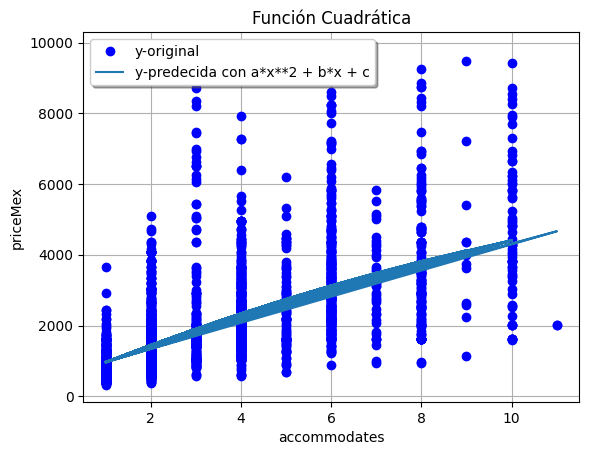

In [133]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred11, label = "y-predecida con a*x**2 + b*x + c")
plt.xlabel('accommodates')
plt.ylabel('priceMex')
plt.title("Función Cuadrática")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

### Función de Valor Absoluto

In [134]:
# Declaramos las variables dependientes e independientes para la regresión no lineal cuadrática
Vars_Indep = df[['accommodates']]
Var_Dep = df['priceMex']

# Redefinimos las variables
x = Vars_Indep
y = Var_Dep

def func_abs(x, a, b, c):
  return a * np.abs(x) + b * x + c

# Ajustar los parámetros de la función curve_fit

parametros12, covs = curve_fit(func_abs, df["accommodates"], df['priceMex']) # Función, x, y

# Obtenemos los coeficientes del modelo de regresión no lineal (a, b, y c)
parametros12

# Predicciones

y_pred12 = func_abs(x,*parametros12) # El * da todas las posiciones

# Observamos los valores
y_pred12

# Calculamos el coeficiente de determinación del modelo

R2_Modelo12 = r2_score(y, y_pred12)
R2_Modelo12

# Calculamos el coeficiente de correlación del modelo
R12 = np.sqrt(R2_Modelo12)
R12

np.float64(0.6276314467730186)

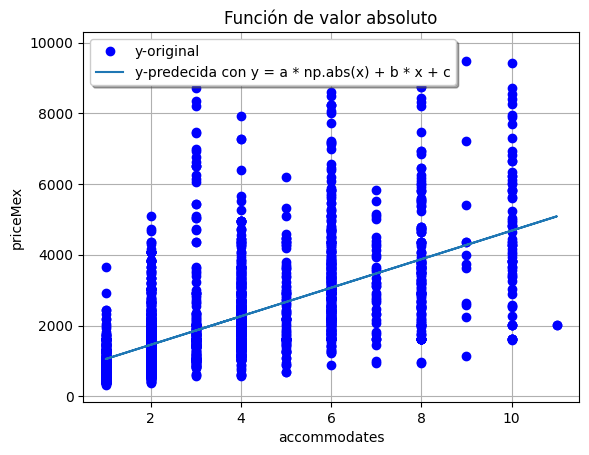

In [135]:
# Graficamos las predicciones y los datos originales para realizar la comparación

plt.plot(x,y,'bo', label = 'y-original')
plt.plot(x, y_pred12, label = "y-predecida con y = a * np.abs(x) + b * x + c")
plt.xlabel('accommodates')
plt.ylabel('priceMex')
plt.title("Función de valor absoluto")
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)
plt.show()

# Resumen

In [155]:
print(f"""host_response_rate: \n
      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo1,2)}
      Coeficiente de Correlación: {round(R,2)}\n
      Modelo 2 - Función Polinomial Inversa:
      Coeficiente de Determinación: {round(R2_Modelo2,2)}
      Coeficiente de Correlación: {round(R2,2)}\n""")


print(f"""host_acceptance_rate: \n
      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo3,2)}
      Coeficiente de Correlación: {round(R3,2)}\n
      Modelo 2 - Función de Valor Absoluto:
      Coeficiente de Determinación: {round(R2_Modelo4,2)}
      Coeficiente de Correlación: {round(R4,2)}\n""")

print(f"""host_total_listings_count: \n
      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo5,2)}
      Coeficiente de Correlación: {round(R5,2)}\n
      Modelo 2 - Función Polinomial Inversa:
      Coeficiente de Determinación: {round(R2_Modelo6,2)}
      Coeficiente de Correlación: {round(R6,2)}\n""")

print(f"""accommodates: \n
      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo7,2)}
      Coeficiente de Correlación: {round(R7,2)}\n
      Modelo 2 - Función Polinomial Inversa:
      Coeficiente de Determinación: {round(R2_Modelo8,2)}
      Coeficiente de Correlación: {round(R8,2)}\n""")

print(f"""reviews_per_month: \n
      Modelo 1 - Función Exponencial:
      Coeficiente de Determinación: {round(R2_Modelo9,2)}
      Coeficiente de Correlación: {round(R9,2)}\n
      Modelo 2 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo10,2)}
      Coeficiente de Correlación: {round(R10,2)}\n""")

print(f"""priceMex: \n
      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: {round(R2_Modelo11,2)}
      Coeficiente de Correlación: {round(R11,2)}\n
      Modelo 2 - Función de Valor Absoluto:
      Coeficiente de Determinación: {round(R2_Modelo12,2)}
      Coeficiente de Correlación: {round(R12,2)}\n""")

host_response_rate: 

      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: 0.82
      Coeficiente de Correlación: 0.9

      Modelo 2 - Función Polinomial Inversa:
      Coeficiente de Determinación: 0.79
      Coeficiente de Correlación: 0.89

host_acceptance_rate: 

      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: 0.24
      Coeficiente de Correlación: 0.49

      Modelo 2 - Función de Valor Absoluto:
      Coeficiente de Determinación: 0.23
      Coeficiente de Correlación: 0.48

host_total_listings_count: 

      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: 0.43
      Coeficiente de Correlación: 0.66

      Modelo 2 - Función Polinomial Inversa:
      Coeficiente de Determinación: 0.42
      Coeficiente de Correlación: 0.65

accommodates: 

      Modelo 1 - Función Cuadrática:
      Coeficiente de Determinación: 0.67
      Coeficiente de Correlación: 0.82

      Modelo 2 - Función Polinomial Inversa:
      Coeficient